# Матричная факторизация

Подготовил *Ян Пиле*

Сейчас речь пойдет о сингулярном разложении матрицы. Некоторое время назад мы поговорили про LU-разложение и выяснили, что иногда матрицы можно раскладывать в произведения других матриц с полезными свойствами. Сингулярное разложение или SVD(Singular Value Decomposition) – один из наиболее полезных алгоритмов линейной алгебры, который "переехал" в машинное обучение.

# Cингулярное разложение (как понимать)

Представим, что у нас есть квадрат с ориентированными сторонами:

<img src="SVD pics/oriented_square.png" alt="" style="width: 20%"/>

Как мы можем этот объект "пошатать"? Ну, например, его можно повернуть вокруг оси, проходящей через центр. А еще его можно деформировать: сжать или растянуть вдоль какой-то оси или "потянув за какой-то из углов". А еще можно эти преобразования производить подряд друг за другом, получится при этом что-то такое:

<img src="SVD pics/transformations.png" alt="" style="width: 70%"/>
"А я еще много всяких преобразований могу придумать", скажете Вы. И будете правы. Но мы ограничимся только случаем ЛИНЕЙНЫХ преобразований. Что это такое? Представьте, что вы на своем квадрате провели произвольную прямую линию. Если после преобразования линия также осталась прямой (как бы вы начальную линию не провели), то преобразование линейное :)

Например преобразование $M$ линейное, а $M'$ - нелинейное.

<img src="SVD pics/nonlinear.png" alt="" style="width: 70%"/>

А теперь полезный факт: Любое линейное преобразование может быть представлено в виде комбинации сжатий-растяжений, отражений и поворотов. Именно такое представление линейного преобразования и делает SVD!

# Вывод для 2D

<img src="SVD pics/notation.png" alt="" style="width: 70%"/>

Пусть у нас есть два перпендикулярных вектора и их линейное преобразование с помощью матрицы $M$. Запишем результат преобразования так:

$$M\overrightarrow{v_1} = \sigma_1\overrightarrow{u_1}$$
$$M\overrightarrow{v_2} = \sigma_2\overrightarrow{u_2}$$

Здесь $\overrightarrow{u_{1,2}}$ - векторы единичной длины, а $\sigma_{1,2}$ - их длины

Любой вектор $\overrightarrow{x}$ на нашей плоскости можно разложить по базису $\overrightarrow{v_{1,2}}$:

$$\overrightarrow{x} = (\overrightarrow{x}\overrightarrow{v_1})\overrightarrow{v_1} + (\overrightarrow{x}\overrightarrow{v_2})\overrightarrow{v_2}$$

Здесь () - скалярное произведение.

Для удобства я далее опущу стрелочки (но будем помнить, что это не числа, а вектора). Умножим наше равенство на матрицу $M$:
$$Mx = (xv_1)Mv_1 + (xv_2)Mv_2$$

Перепишем через $Mv_{1,2} = \sigma_{1,2}u_{1,2}$

Получаем:
$$Mx = (xv_1)\sigma_{1}u_{1} + (xv_2)\sigma_{2}u_{2}$$

Ну а теперь воспользуемся тем, что можно "переставить" множители внутри скалярного произведения:

$$Mx = u_{1}\sigma_{1}(v^T_1x) + u_{2}\sigma_{2}(v^T_2x)$$

Поскольку $x$ в нашем выражении произвольный, можно заключить, что:

$$M = u_{1}\sigma_{1}v^T_1 + u_{2}\sigma_{2}v^T_2$$

В матричной форме это запишется так:

$$M = \begin{pmatrix}u_{1} & u_{2}\end{pmatrix}\begin{pmatrix}\sigma_{1} & 0 \\ 0 & \sigma_{2} \end{pmatrix} \begin{pmatrix}v^T_1 \\v^T_2\end{pmatrix} $$

Для двумерного случая мы получили то самое SVD:

$$M = U\Sigma V^T$$

# А как быть с настоящими матрицами?

У нас же матрицы могут быть с признаками, мы же ради машинного обучения тут собрались...
Воспользуемся советом эксперта в этой области.
Слово предоставляется [Джеффу Хинтону](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwihwNn9rYrvAhVBx4sKHTl7AA8QmhMwL3oECDwQAg&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FGeoffrey_Hinton&usg=AOvVaw1bwQV37d5Syqi535mReyLG):

"*Чтобы иметь дело с гиперплоскостями в 14-мерном пространстве, представьте трехмерное пространство и очень громко скажите себе «четырнадцать». Все так делают.*"

Наш случай с матрицами вместо векторов – примерно такое обобщение. 

<img src="SVD pics/Real_SVD.png" alt="" style="width: 70%"/>


# Смысл алгоритма построения SVD

На самом деле, новый базис выбирается не случайным образом, а так, чтобы каждое следующее направление наилучшим образом характеризовало наш набор точек. Например для двумерного облака в форме эллипса $v_{1,2}$ будут выбраны так:
<img src="SVD pics/PCA.png" alt="" style="width: 60%"/>

Видно, что проекции на эти два направления "наилучшим образом" описывают наше облако точек.

На самом деле, если у нас есть матрица $A$ ранга $k$, то ее всегда можно разложить в произведение "тонкой" и "длинной" матриц ранга k:

<img src="SVD pics/reduction.png" alt="" style="width: 60%"/>

А если бы мы могли представить исходную матрицу в виде произведения матриц с МЕНЬШИМ рангом, что бы это дало? 

1) Сжатие информации. Если исходная матрица хранит $mn$ элементов, то произведение матриц меньшего ранга (например, ранга k) потребовало бы хранить $k(m+n)$, а для маленьких $k$ это будет очень выгодно! 

2) Способ убрать шум. Если в нашей настоящей матрице есть и нужная нам информация и какой-то ненужный нам "шум", то взятие только нескольких ГЛАВНЫХ компонент (например длинная полуось эллипса в примере выше) помогло бы описать наше множество точек "удалив" этот шум

3) А еще таким образом можно "заполнять" пропущенные значения в матрице. Но это уже отдельная история.

На самом деле, SVD как раз и позволяет нам аппроксимировать исходную матрицу А матрицей меньшей размерности k. Кроме того, сингулярное разложение может быть построено не только для квадратных матриц, но и для матриц произвольной размерности. Если рассматривать нашу матрицу размера $n*d$ как множество $n$ точек из $d-$мерного пространства, то SVD решает задачу о приближении исходного набора точек набором точек в подпространстве меньшей размерности "наилучшим образом". По сути, это способ понизить размерность нашей задачи. "Наилучшим образом" означает, что сумма квадратов длин перпендикуляров из исходных точек на их проекции будет минимальной (большая часть разброса множества точек будет сосредоточена в нашем пространстве меньшей размерности). 

# SVD и отрезание фона на видео

In [2]:
import moviepy.editor as mpe
import numpy as np
import scipy

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
np.set_printoptions(precision=4, suppress=True)

In [4]:
video = mpe.VideoFileClip("https://github.com/momonala/image-processing-projects/blob/master/background_removal/video/Video_003/Video_003.avi?raw=true")

In [7]:
# Обрезать первые 50 секунд
# clip.subclip(t_start,t_end)

video.subclip(0,50).ipython_display(width=300)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



TypeError: must be real number, not NoneType

In [8]:
from PIL import Image
import PIL

# Перевод видео в ч/б

In [9]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Делаем матрицу

Технически, видео - набор кадров, каждый из которых - матрица яркости пикселей. Если взять каждую матрицу кадра, "выпрямить" ее (превратить в один большой вектор) , а потом векторы всех кадров уложить один под другой, мы получим матрицу, каждая строка которой будет отражать состояние яркости пикселей в конкретном кадре. Попробуем такую матрицу сделать:

In [10]:
def resize(clip, scale, i, fps):
    im = Image.fromarray(rgb2gray(clip.get_frame(i/float(fps))))
    size = tuple((np.array(im.size) * scale).astype(int))
    new_image = np.array(im.resize(size, PIL.Image.BICUBIC))
    return new_image



In [11]:
def create_data_matrix_from_video(clip, fps=5, scale=0.5):
    return np.vstack([
        resize(clip, scale, i, fps).flatten() for i in range(fps * int(clip.duration))]).T

In [12]:
scale = 0.50   # Шкалируем наше видео (чуток ужмем)
dims = (int(240 * scale), int(320 * scale))
fps = 60      # Кол-во кадров в секунду

In [13]:
M = create_data_matrix_from_video(video.subclip(0,100), fps, scale)

# Глянем на то, какая матрица получилась

In [14]:
print(dims, M.shape)

(120, 160) (19200, 6780)


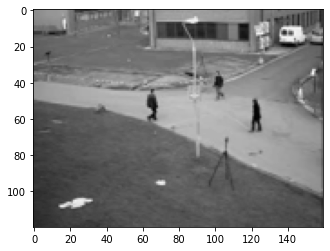

In [15]:
plt.imshow(np.reshape(M[:,140], dims), cmap='gray');

В нашей матрице изменяющимися компонентами являются пиксели, отвечающие за движущиеся предметы (они перемещаются от кадра к кадру), а фон остается при этом неподвижным. Значит если мы решим "приблизить" матрицу нашего видео матрицей меньшей размерности (Скажем, оставим один левый сингулярный вектор и один правый сингулярный вектор), в ней останется та часть матрицы, которая "наиболее постоянна" во всех строках и во всех столбцах (а это и есть фон).

In [16]:
U, s, V = np.linalg.svd(M, full_matrices=False)

In [17]:
np.expand_dims(V[0,:], 0).shape

(1, 6780)

In [18]:
low_rank = np.expand_dims(U[:,0], 1) * s[0] * np.expand_dims(V[0,:], 0)

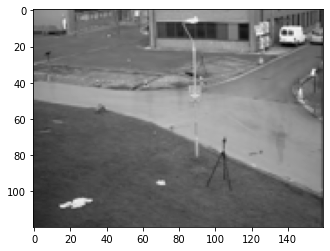

In [24]:
plt.imshow(np.reshape(low_rank[:,0], dims), cmap='gray');

# Запакуем это в видео

In [19]:
from moviepy.video.io.bindings import mplfig_to_npimage

def make_video(matrix, dims, filename):
    mat_reshaped = np.reshape(matrix, (dims[0], dims[1], -1))
    
    fig, ax = plt.subplots()
    def make_frame(t):
        ax.clear()
        ax.imshow(mat_reshaped[...,int(t*fps)])
        return mplfig_to_npimage(fig)
    
    animation = mpe.VideoClip(make_frame, duration=int(10))
    animation.write_videofile(filename + '.mp4', fps=fps, verbose = False, logger=None)

TypeError: must be real number, not NoneType

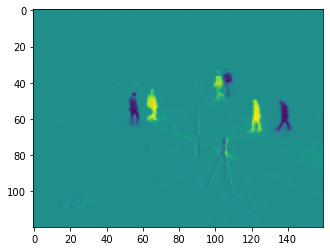

In [20]:
make_video(M - low_rank, dims, "figures2")

In [ ]:
mpe.VideoFileClip("figures2.mp4").subclip(0,10).ipython_display(width=400)